In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('deeplearning.mplstyle')
import matplotlib.pyplot as plt

plt.style.use('./util/deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from util.lab_utils_common import *
from util.lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
X, Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


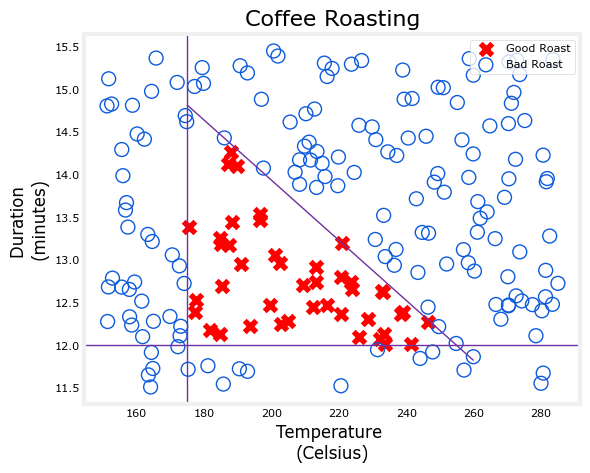

In [3]:
plt_roast(X, Y)

In [4]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:, 0]):0.2f}, {np.min(X[:, 0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:, 1]):0.2f}, {np.min(X[:, 1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:, 0]):0.2f}, {np.min(Xn[:, 0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:, 1]):0.2f}, {np.min(Xn[:, 1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [5]:
print(Xn.shape, Y.shape)
Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200, 2) (200, 1)
(200000, 2) (200000, 1)


In [6]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(3, activation='sigmoid', name='layer1'),
    Dense(1, activation='sigmoid', name='layer2')
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
L1_num_params = 2 * 3 + 3  # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1  # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params)

L1 params =  9 , L2 params =  4


In [9]:
W1, b1 = model.get_layer('layer1').get_weights()
W2, b2 = model.get_layer('layer2').get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b1.shape}:", b2)


W1(2, 3):
 [[-0.15 -0.46 -0.57]
 [-0.21 -0.08  0.83]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 1.11]
 [-1.06]
 [-0.95]] 
b2(3,): [0.]


In [10]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

model.fit(Xt, Yt, epochs=10)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 603us/step - loss: 0.2587
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 580us/step - loss: 0.0488
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 592us/step - loss: 0.0196
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 582us/step - loss: 0.0119
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 583us/step - loss: 0.0080
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 618us/step - loss: 0.0055
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 602us/step - loss: 0.0039
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 616us/step - loss: 0.0027
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 600us/step - loss: 0.0019
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 590us/step - loss: 0.0014


In [11]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[  0.19 -11.12  14.56]
 [ 10.61  -0.26  12.15]] 
b1: [ 12.75 -11.98   2.03]
W2:
 [[ 47.83]
 [-58.03]
 [-49.81]] 
b2: [-14.87]


In [12]:
W1 = np.array([
    [-8.94, 0.29, 12.89],
    [-0.17, -7.34, 10.79]
])
b1 = np.array([-9.87, -9.28, 1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])

model.get_layer("layer1").set_weights([W1, b1])
model.get_layer("layer2").set_weights([W2, b2])

In [13]:
# Check if the weights are successfully replaced
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-8.94  0.29 12.89]
 [-0.17 -7.34 10.79]] 
b1: [-9.87 -9.28  1.01]
W2:
 [[-31.38]
 [-27.86]
 [-32.79]] 
b2: [15.54]


In [19]:
X_test = np.array([
    [200, 13.9],  # positive example
    [200, 17]])  # negative example

X_testn = norm_l(X_test)
print(X_testn)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

tf.Tensor(
[[-0.47  0.42]
 [-0.47  3.16]], shape=(2, 2), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
predictions = 
 [[9.63e-01]
 [3.03e-08]]


In [23]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0

print(f"decisions = \n{yhat}")


decisions = 
[[1.]
 [0.]]


In [24]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


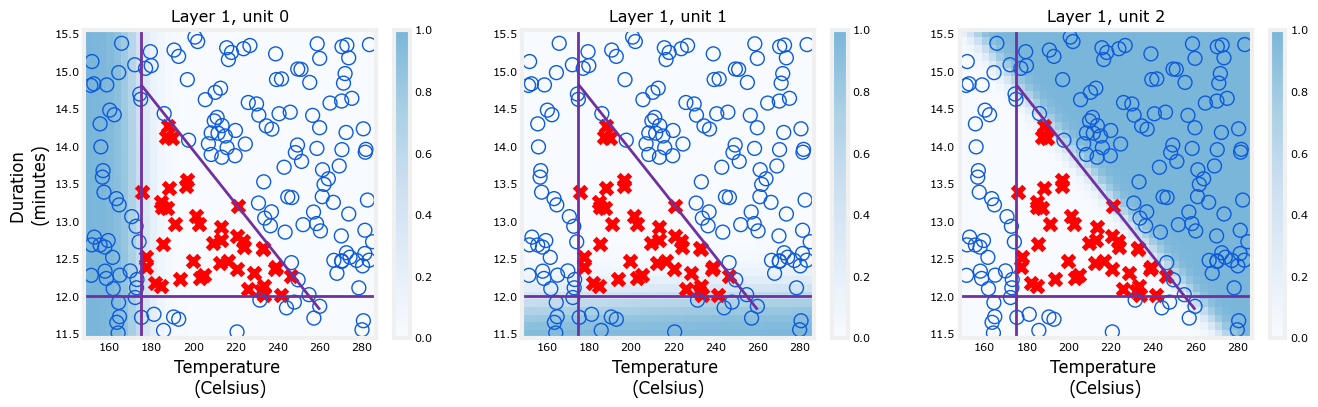

In [25]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

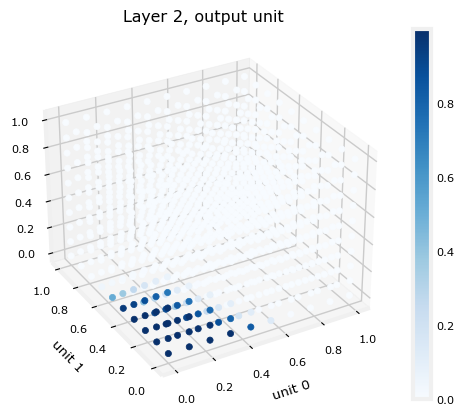

In [26]:
plt_output_unit(W2,b2)

In [ ]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━